In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from preprocess import data_pipe
import tensorflow as tf

In [2]:
df = pd.read_csv(os.path.join('data', 'stocks_1980_2020.csv'))
df.set_index('Date', inplace=True)

In [3]:
df.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BRK-B,BA,BAC,BMY,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.849159,0.129047,0.096055,...,0.000661,0.033995,NaN,NaN,NaN,NaN,NaN,0.003375,0.049441,0.607339
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.872450,0.127853,0.095065,...,0.000661,0.033537,NaN,NaN,NaN,NaN,NaN,0.003326,0.048887,0.591838
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.054105,0.127853,0.095395,...,0.000685,0.033709,NaN,NaN,NaN,NaN,NaN,0.003358,0.049994,0.597475
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.128629,0.129047,0.095725,...,0.000685,0.033537,NaN,NaN,NaN,NaN,NaN,0.003358,0.049810,0.594657
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.161235,0.127853,0.099026,...,0.000718,0.033652,NaN,NaN,NaN,NaN,NaN,0.003375,0.050732,0.598884


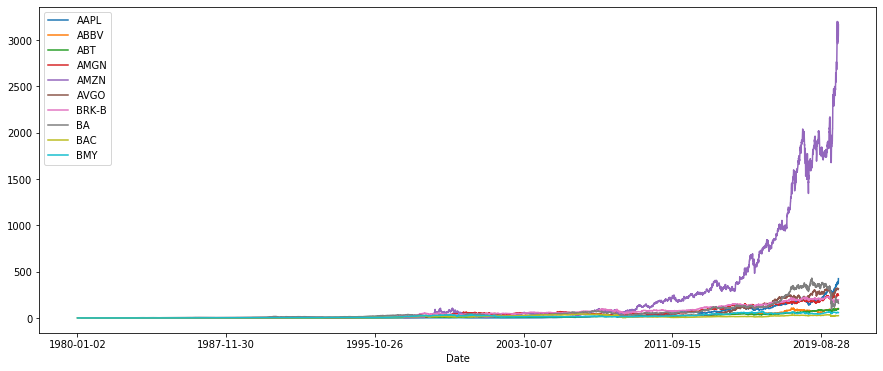

In [4]:
df.iloc[:, :10].plot(figsize=(15, 6));

# Recurent Neural Networks (RNN)
Recurrent Neural Networks take the time dimension into accout by introducing a recursive connection with a time delay of -1. Keras implements RNN with the class called SimpleRNN.

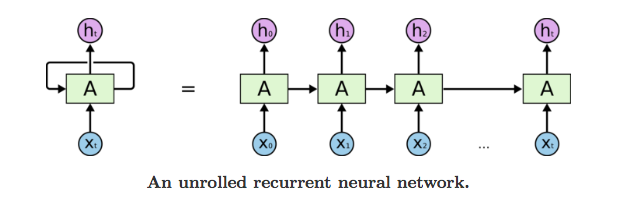

In [5]:
Image(filename="rnn.png")

### Preprocess data
Train model on 10 stocks.

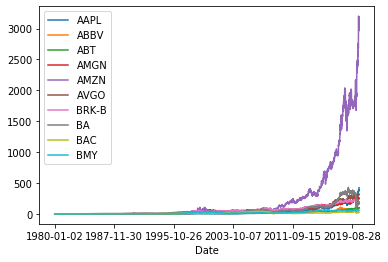

In [6]:
df = df.iloc[:, :10]
df.plot();

## RNN

In [7]:
def two_layered_rnn(
    units=20, 
    input_shape=1, 
    output_shape=1, 
    learning_rate=0.01
):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.SimpleRNN(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.SimpleRNN(units))
    model.add(tf.keras.layers.Dense(output_shape))
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse'])
    
    return model

In [8]:
def training_loop(model):
    metrics_df = pd.DataFrame()

    optim_param_dict = {}

    for c in df.columns:
        optim_param = pd.DataFrame()
        if df.loc[:, c].isnull().sum()/len(df) < 0.5:
            df.loc[:, c].plot(title=f'{c}');
            plt.show();
            print(c)
            print(df[c].shape)
            
            first_valid = df.loc[:, c].first_valid_index()
            
            data_dict = data_pipe(
                df.loc[first_valid:, c].values.reshape(-1, 1), 
                use_tf_data=False,
                use_transformer=True
            )

            xtrain, ytrain, xval, yval, xtest, ytest = (
                data_dict['xtrain'], data_dict['ytrain'], 
                data_dict['xval'], data_dict['yval'],  
                data_dict['xtest'], data_dict['ytest']
            )

            num_outputs = ytrain.shape[-1]
            hyper_lstm = None
            model = None
            model = two_layered_rnn()

            history = model.fit(xtrain,
                            ytrain,
                            batch_size=128,
                            epochs=20,
                            validation_data=(xval, yval),
                            verbose=1)
            
            pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
            plt.gca().set_ylim(0, 500)
            plt.show();

            print('#' * 50)




# Training of RNN

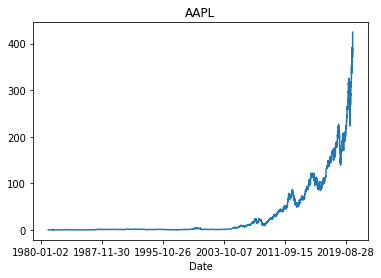

AAPL
(10234,)
Train on 7465 samples, validate on 1219 samples
Epoch 1/20
7465/7465 [==============================] - 4s 590us/sample - loss: 2.5581 - mae: 2.9559 - mse: 37.2949 - val_loss: 63.3538 - val_mae: 63.8538 - val_mse: 4619.9067
Epoch 2/20
7465/7465 [==============================] - 2s 286us/sample - loss: 1.7074 - mae: 2.0819 - mse: 22.0966 - val_loss: 59.8046 - val_mae: 60.3046 - val_mse: 4178.3594
Epoch 3/20
7465/7465 [==============================] - 2s 288us/sample - loss: 1.3781 - mae: 1.7572 - mse: 15.3588 - val_loss: 57.8484 - val_mae: 58.3484 - val_mse: 3946.2058
Epoch 4/20
7465/7465 [==============================] - 2s 290us/sample - loss: 1.1800 - mae: 1.5290 - mse: 12.0788 - val_loss: 55.9048 - val_mae: 56.4048 - val_mse: 3723.2117
Epoch 5/20
7465/7465 [==============================] - 2s 294us/sample - loss: 0.9120 - mae: 1.2242 - mse: 8.2587 - val_loss: 53.2810 - val_mae: 53.7810 - val_mse: 3433.9028
Epoch 6/20
7465/7465 [==============================] - 2s 

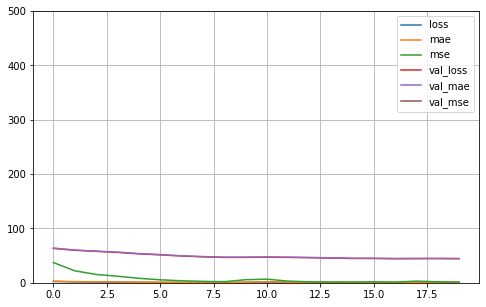

##################################################


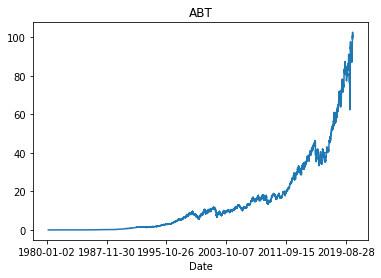

ABT
(10234,)
Train on 7606 samples, validate on 1243 samples
Epoch 1/20
7606/7606 [==============================] - 4s 531us/sample - loss: 2.5508 - mae: 2.9876 - mse: 19.6786 - val_loss: 17.6044 - val_mae: 18.1044 - val_mse: 393.6165
Epoch 2/20
7606/7606 [==============================] - 2s 305us/sample - loss: 0.9015 - mae: 1.2768 - mse: 3.7214 - val_loss: 14.4497 - val_mae: 14.9497 - val_mse: 289.5079
Epoch 3/20
7606/7606 [==============================] - 2s 289us/sample - loss: 0.5924 - mae: 0.9581 - mse: 1.7850 - val_loss: 12.3665 - val_mae: 12.8665 - val_mse: 229.9665
Epoch 4/20
7606/7606 [==============================] - 2s 287us/sample - loss: 0.3811 - mae: 0.7253 - mse: 0.9200 - val_loss: 11.5316 - val_mae: 12.0316 - val_mse: 205.6795
Epoch 5/20
7606/7606 [==============================] - 2s 310us/sample - loss: 0.2959 - mae: 0.6232 - mse: 0.6833 - val_loss: 10.6355 - val_mae: 11.1088 - val_mse: 187.3992
Epoch 6/20
7606/7606 [==============================] - 2s 304us/sam

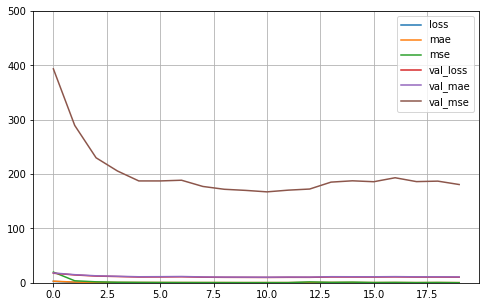

##################################################


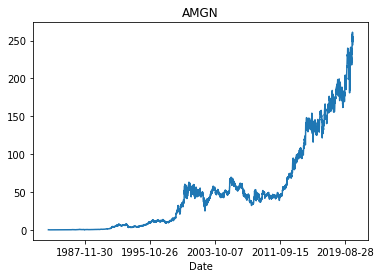

AMGN
(10234,)
Train on 6989 samples, validate on 1140 samples
Epoch 1/20
6989/6989 [==============================] - 4s 552us/sample - loss: 19.0259 - mae: 19.5125 - mse: 689.4544 - val_loss: 78.1940 - val_mae: 78.6940 - val_mse: 7267.6211
Epoch 2/20
6989/6989 [==============================] - 2s 284us/sample - loss: 13.4139 - mae: 13.8820 - mse: 390.1577 - val_loss: 68.1343 - val_mae: 68.6343 - val_mse: 5792.7876
Epoch 3/20
6989/6989 [==============================] - 2s 290us/sample - loss: 9.3667 - mae: 9.8232 - mse: 196.7077 - val_loss: 58.9825 - val_mae: 59.4825 - val_mse: 4619.9854
Epoch 4/20
6989/6989 [==============================] - 2s 287us/sample - loss: 6.0941 - mae: 6.5660 - mse: 84.6066 - val_loss: 50.3455 - val_mae: 50.8440 - val_mse: 3665.5869
Epoch 5/20
6989/6989 [==============================] - 2s 289us/sample - loss: 3.7661 - mae: 4.2261 - mse: 36.1107 - val_loss: 44.8848 - val_mae: 45.3723 - val_mse: 3105.0032
Epoch 6/20
6989/6989 [=============================

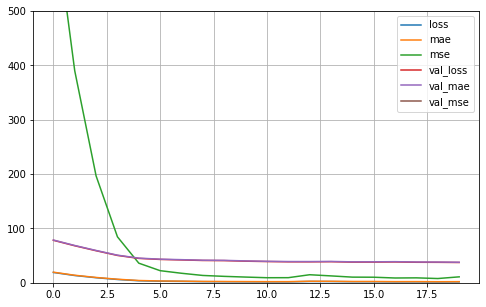

##################################################


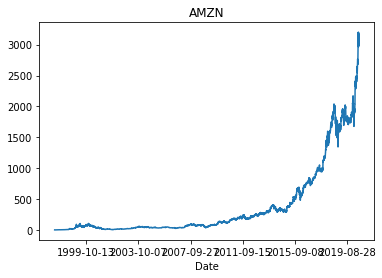

AMZN
(10234,)
Train on 4351 samples, validate on 700 samples
Epoch 1/20
4351/4351 [==============================] - 3s 761us/sample - loss: 87.9899 - mae: 88.4875 - mse: 17114.9766 - val_loss: 645.8939 - val_mae: 646.3939 - val_mse: 459838.3125
Epoch 2/20
4351/4351 [==============================] - 1s 288us/sample - loss: 81.6364 - mae: 82.1328 - mse: 15808.6475 - val_loss: 639.0430 - val_mae: 639.5430 - val_mse: 451028.4688
Epoch 3/20
4351/4351 [==============================] - 1s 288us/sample - loss: 77.2252 - mae: 77.7235 - mse: 14784.1445 - val_loss: 632.3006 - val_mae: 632.8006 - val_mse: 442449.9062
Epoch 4/20
4351/4351 [==============================] - 1s 279us/sample - loss: 73.2980 - mae: 73.7965 - mse: 13810.5645 - val_loss: 625.3662 - val_mae: 625.8663 - val_mse: 433721.7812
Epoch 5/20
4351/4351 [==============================] - 1s 290us/sample - loss: 70.0692 - mae: 70.5633 - mse: 12976.4785 - val_loss: 619.1701 - val_mae: 619.6701 - val_mse: 426004.3438
Epoch 6/20
435

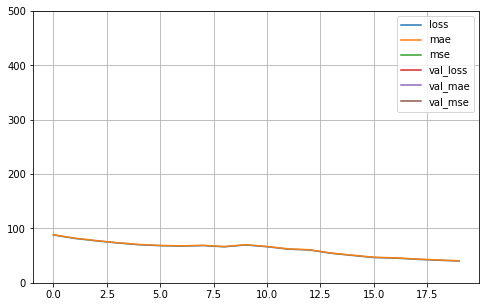

##################################################


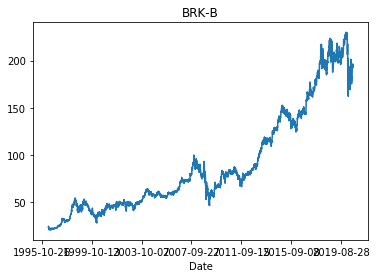

BRK-B
(10234,)
Train on 4544 samples, validate on 732 samples
Epoch 1/20
4544/4544 [==============================] - 3s 735us/sample - loss: 52.6266 - mae: 53.1266 - mse: 3400.8621 - val_loss: 132.5474 - val_mae: 133.0474 - val_mse: 17849.6562
Epoch 2/20
4544/4544 [==============================] - 1s 287us/sample - loss: 44.0047 - mae: 44.5042 - mse: 2550.3516 - val_loss: 124.9443 - val_mae: 125.4443 - val_mse: 15884.3105
Epoch 3/20
4544/4544 [==============================] - 1s 291us/sample - loss: 36.7904 - mae: 37.2885 - mse: 1940.4611 - val_loss: 117.5455 - val_mae: 118.0455 - val_mse: 14082.7812
Epoch 4/20
4544/4544 [==============================] - 1s 294us/sample - loss: 30.3639 - mae: 30.8611 - mse: 1451.3622 - val_loss: 110.2750 - val_mae: 110.7750 - val_mse: 12419.1475
Epoch 5/20
4544/4544 [==============================] - 1s 288us/sample - loss: 24.8369 - mae: 25.3332 - mse: 1072.3453 - val_loss: 103.1288 - val_mae: 103.6288 - val_mse: 10886.9766
Epoch 6/20
4544/4544 [=

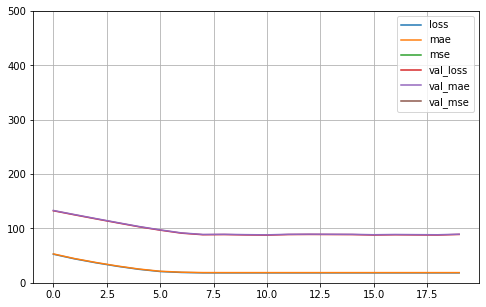

##################################################


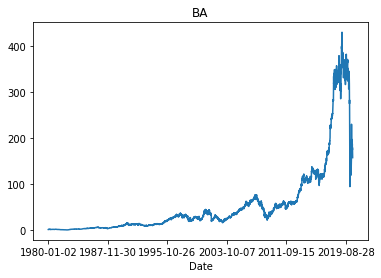

BA
(10234,)
Train on 7645 samples, validate on 1249 samples
Epoch 1/20
7645/7645 [==============================] - 4s 570us/sample - loss: 14.5050 - mae: 14.9942 - mse: 443.8195 - val_loss: 63.7150 - val_mae: 64.2150 - val_mse: 4878.8291
Epoch 2/20
7645/7645 [==============================] - 2s 288us/sample - loss: 8.7326 - mae: 9.2135 - mse: 217.5146 - val_loss: 54.2722 - val_mae: 54.7722 - val_mse: 3755.4661
Epoch 3/20
7645/7645 [==============================] - 2s 284us/sample - loss: 6.0354 - mae: 6.5058 - mse: 127.5572 - val_loss: 48.5433 - val_mae: 49.0433 - val_mse: 3160.9038
Epoch 4/20
7645/7645 [==============================] - 2s 284us/sample - loss: 5.0731 - mae: 5.5360 - mse: 93.7898 - val_loss: 45.4339 - val_mae: 45.9339 - val_mse: 2862.5640
Epoch 5/20
7645/7645 [==============================] - 2s 288us/sample - loss: 4.6154 - mae: 5.0806 - mse: 74.1589 - val_loss: 42.6378 - val_mae: 43.1378 - val_mse: 2614.1345
Epoch 6/20
7645/7645 [==============================] -

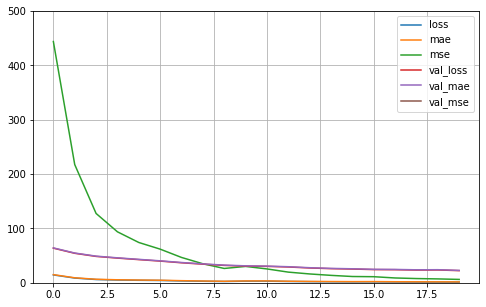

##################################################


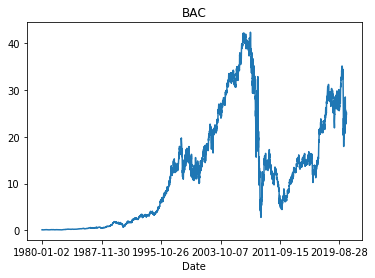

BAC
(10234,)
Train on 7645 samples, validate on 1249 samples
Epoch 1/20
7645/7645 [==============================] - 4s 522us/sample - loss: 7.8655 - mae: 8.3193 - mse: 172.7453 - val_loss: 1.9708 - val_mae: 2.4308 - val_mse: 8.2697
Epoch 2/20
7645/7645 [==============================] - 2s 292us/sample - loss: 3.9981 - mae: 4.4272 - mse: 63.3477 - val_loss: 0.4205 - val_mae: 0.7997 - val_mse: 0.9402
Epoch 3/20
7645/7645 [==============================] - 2s 287us/sample - loss: 3.0117 - mae: 3.4324 - mse: 36.4742 - val_loss: 2.6694 - val_mae: 3.1694 - val_mse: 10.7557
Epoch 4/20
7645/7645 [==============================] - 2s 286us/sample - loss: 2.5843 - mae: 3.0274 - mse: 23.9760 - val_loss: 3.2960 - val_mae: 3.7960 - val_mse: 15.4024
Epoch 5/20
7645/7645 [==============================] - 2s 281us/sample - loss: 2.0873 - mae: 2.5294 - mse: 15.4736 - val_loss: 0.8166 - val_mae: 1.2869 - val_mse: 2.0115
Epoch 6/20
7645/7645 [==============================] - 2s 291us/sample - loss: 2

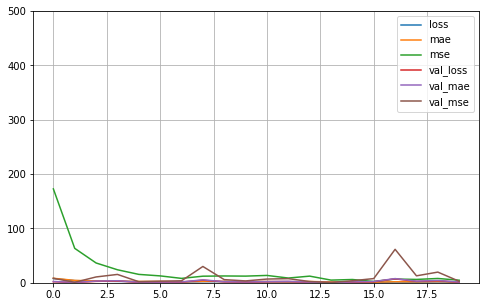

##################################################


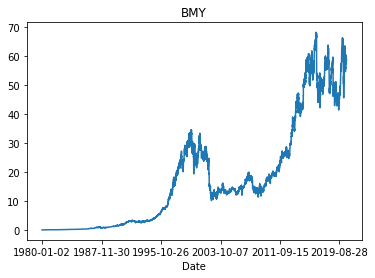

BMY
(10234,)
Train on 7645 samples, validate on 1249 samples
Epoch 1/20
7645/7645 [==============================] - 4s 585us/sample - loss: 6.4581 - mae: 6.9372 - mse: 92.3594 - val_loss: 21.8057 - val_mae: 22.3057 - val_mse: 633.9400
Epoch 2/20
7645/7645 [==============================] - 2s 294us/sample - loss: 2.9043 - mae: 3.3506 - mse: 28.9928 - val_loss: 16.9395 - val_mae: 17.4395 - val_mse: 437.5299
Epoch 3/20
7645/7645 [==============================] - 2s 301us/sample - loss: 2.2051 - mae: 2.6317 - mse: 18.4173 - val_loss: 15.4230 - val_mae: 15.9230 - val_mse: 378.3263
Epoch 4/20
7645/7645 [==============================] - 2s 301us/sample - loss: 1.9254 - mae: 2.3601 - mse: 13.8460 - val_loss: 13.8072 - val_mae: 14.3072 - val_mse: 321.4804
Epoch 5/20
7645/7645 [==============================] - 2s 289us/sample - loss: 1.5173 - mae: 1.9412 - mse: 8.8597 - val_loss: 11.3897 - val_mae: 11.8806 - val_mse: 256.9204
Epoch 6/20
7645/7645 [==============================] - 2s 283us/

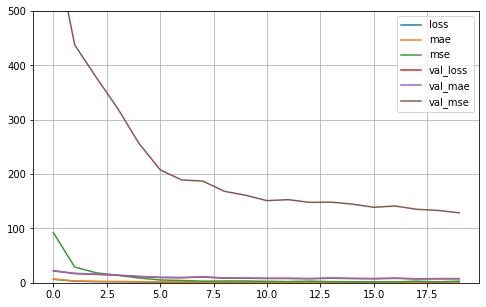

##################################################


In [9]:
model = two_layered_rnn()
training_loop(model)

## Gated Recurrent Networks

RNNs suffer from exploding or vanishing gradients. RNNs can have a hard time to learn long term dependencies.

**Solutions**:
* Exploding gradients can be addressed by gradient clipping
* Vanishing gradients can be addressed by gater recurrent units



**Examples of gated recurrent units**:
* Long Short Term Memory Networks (LSTM)
* Gated Recurrent Unit (GRU)

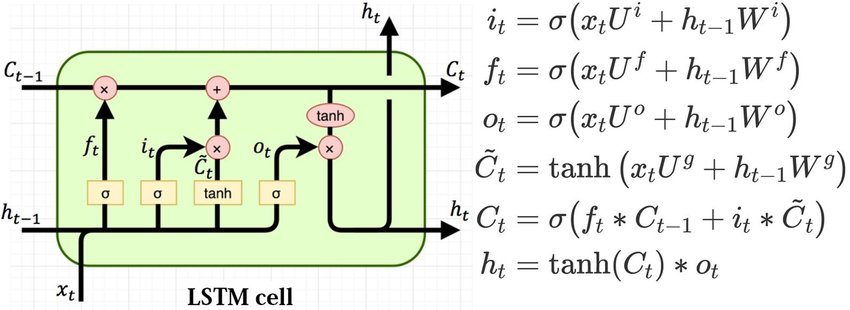

In [10]:
Image(filename="lstm.jpg")

In [11]:
def two_layered_lstm(units=20, input_shape=1, output_shape=1, learning_rate=0.01):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.LSTM(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.LSTM(units))
    model.add(tf.keras.layers.Dense(output_shape))
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse'])
    
    return model

## Training of LSTM

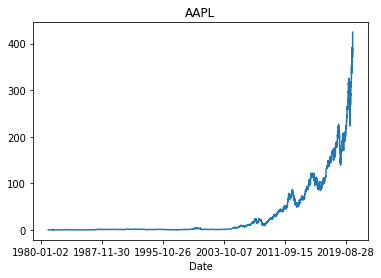

AAPL
(10234,)
Train on 7465 samples, validate on 1219 samples
Epoch 1/20
7465/7465 [==============================] - 4s 564us/sample - loss: 2.4753 - mae: 2.8437 - mse: 39.1222 - val_loss: 62.7989 - val_mae: 63.2989 - val_mse: 4548.6426
Epoch 2/20
7465/7465 [==============================] - 2s 290us/sample - loss: 1.4425 - mae: 1.7710 - mse: 19.1541 - val_loss: 59.0091 - val_mae: 59.5091 - val_mse: 4131.1714
Epoch 3/20
7465/7465 [==============================] - 2s 291us/sample - loss: 1.0647 - mae: 1.3648 - mse: 11.9841 - val_loss: 58.2406 - val_mae: 58.7406 - val_mse: 4076.8865
Epoch 4/20
7465/7465 [==============================] - 2s 291us/sample - loss: 0.8262 - mae: 1.1331 - mse: 7.5916 - val_loss: 55.0973 - val_mae: 55.5973 - val_mse: 3629.0386
Epoch 5/20
7465/7465 [==============================] - 2s 283us/sample - loss: 0.6122 - mae: 0.9078 - mse: 5.0042 - val_loss: 51.5052 - val_mae: 52.0052 - val_mse: 3260.5269
Epoch 6/20
7465/7465 [==============================] - 2s 2

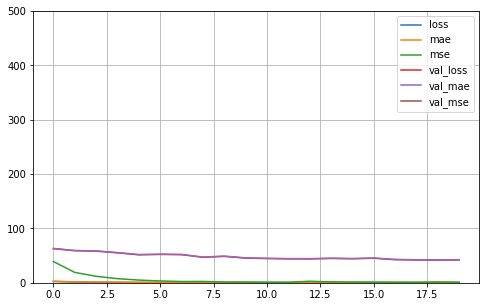

##################################################


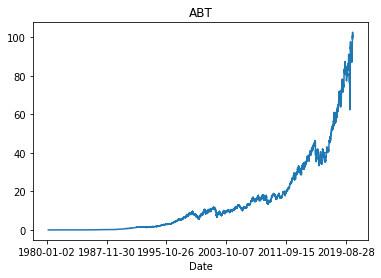

ABT
(10234,)
Train on 7606 samples, validate on 1243 samples
Epoch 1/20
7606/7606 [==============================] - 4s 544us/sample - loss: 1.8562 - mae: 2.2607 - mse: 13.2378 - val_loss: 16.2037 - val_mae: 16.7037 - val_mse: 344.8785
Epoch 2/20
7606/7606 [==============================] - 2s 292us/sample - loss: 0.7247 - mae: 1.0951 - mse: 2.6187 - val_loss: 13.4150 - val_mae: 13.9150 - val_mse: 259.4233
Epoch 3/20
7606/7606 [==============================] - 2s 297us/sample - loss: 0.5045 - mae: 0.8521 - mse: 1.3790 - val_loss: 11.6898 - val_mae: 12.1890 - val_mse: 213.0574
Epoch 4/20
7606/7606 [==============================] - 2s 299us/sample - loss: 0.3389 - mae: 0.6827 - mse: 0.7703 - val_loss: 11.2196 - val_mae: 11.7195 - val_mse: 199.1494
Epoch 5/20
7606/7606 [==============================] - 2s 295us/sample - loss: 0.3430 - mae: 0.6805 - mse: 0.7848 - val_loss: 10.9518 - val_mae: 11.4465 - val_mse: 193.4580
Epoch 6/20
7606/7606 [==============================] - 2s 288us/sam

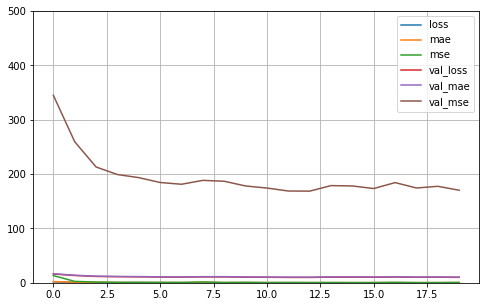

##################################################


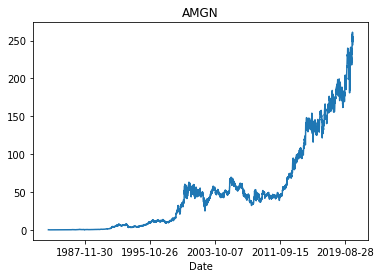

AMGN
(10234,)
Train on 6989 samples, validate on 1140 samples
Epoch 1/20
6989/6989 [==============================] - 4s 546us/sample - loss: 18.4510 - mae: 18.9408 - mse: 658.8827 - val_loss: 76.6550 - val_mae: 77.1550 - val_mse: 7034.2827
Epoch 2/20
6989/6989 [==============================] - 2s 319us/sample - loss: 12.9818 - mae: 13.4586 - mse: 362.0065 - val_loss: 67.2764 - val_mae: 67.7764 - val_mse: 5675.9233
Epoch 3/20
6989/6989 [==============================] - 2s 286us/sample - loss: 11.3935 - mae: 11.8718 - mse: 250.2418 - val_loss: 60.2520 - val_mae: 60.7520 - val_mse: 4772.0166
Epoch 4/20
6989/6989 [==============================] - 2s 291us/sample - loss: 9.9585 - mae: 10.4472 - mse: 192.9306 - val_loss: 52.0757 - val_mae: 52.5753 - val_mse: 3845.0193
Epoch 5/20
6989/6989 [==============================] - 2s 288us/sample - loss: 5.1979 - mae: 5.6810 - mse: 62.8204 - val_loss: 46.6241 - val_mae: 47.1174 - val_mse: 3287.3135
Epoch 6/20
6989/6989 [=========================

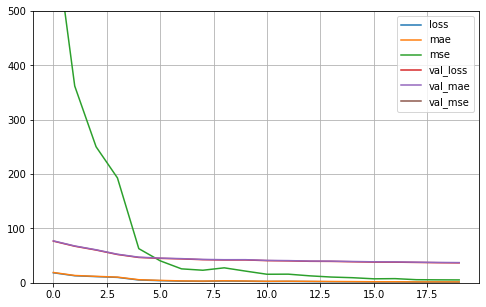

##################################################


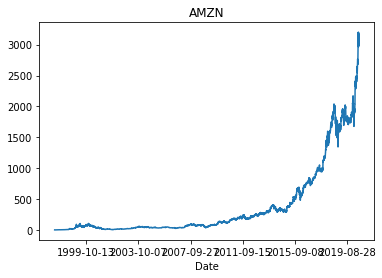

AMZN
(10234,)
Train on 4351 samples, validate on 700 samples
Epoch 1/20
4351/4351 [==============================] - 3s 697us/sample - loss: 88.0400 - mae: 88.5376 - mse: 17113.2480 - val_loss: 645.4196 - val_mae: 645.9196 - val_mse: 459225.3125
Epoch 2/20
4351/4351 [==============================] - 1s 292us/sample - loss: 81.2833 - mae: 81.7792 - mse: 15730.7432 - val_loss: 638.5445 - val_mae: 639.0446 - val_mse: 450391.1250
Epoch 3/20
4351/4351 [==============================] - 1s 290us/sample - loss: 76.9252 - mae: 77.4235 - mse: 14710.1201 - val_loss: 631.7909 - val_mae: 632.2908 - val_mse: 441804.9688
Epoch 4/20
4351/4351 [==============================] - 1s 288us/sample - loss: 73.0241 - mae: 73.5225 - mse: 13742.7451 - val_loss: 624.8684 - val_mae: 625.3684 - val_mse: 433098.9375
Epoch 5/20
4351/4351 [==============================] - 1s 291us/sample - loss: 69.8856 - mae: 70.3797 - mse: 12921.2891 - val_loss: 618.7355 - val_mae: 619.2355 - val_mse: 425465.8438
Epoch 6/20
435

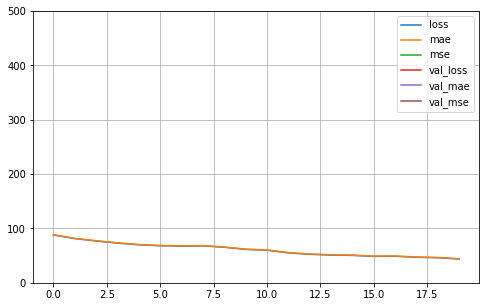

##################################################


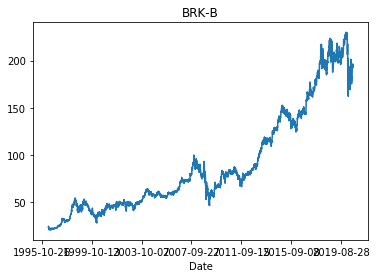

BRK-B
(10234,)
Train on 4544 samples, validate on 732 samples
Epoch 1/20
4544/4544 [==============================] - 3s 742us/sample - loss: 51.4679 - mae: 51.9679 - mse: 3274.4163 - val_loss: 131.8168 - val_mae: 132.3168 - val_mse: 17655.7656
Epoch 2/20
4544/4544 [==============================] - 1s 284us/sample - loss: 43.2907 - mae: 43.7898 - mse: 2487.1189 - val_loss: 124.2445 - val_mae: 124.7445 - val_mse: 15709.2422
Epoch 3/20
4544/4544 [==============================] - 1s 291us/sample - loss: 36.1554 - mae: 36.6537 - mse: 1889.5284 - val_loss: 116.8463 - val_mae: 117.3463 - val_mse: 13918.1953
Epoch 4/20
4544/4544 [==============================] - 1s 289us/sample - loss: 29.7993 - mae: 30.2969 - mse: 1411.0465 - val_loss: 109.5862 - val_mae: 110.0862 - val_mse: 12267.0234
Epoch 5/20
4544/4544 [==============================] - 1s 295us/sample - loss: 24.3759 - mae: 24.8724 - mse: 1042.6290 - val_loss: 102.4705 - val_mae: 102.9705 - val_mse: 10750.9648
Epoch 6/20
4544/4544 [=

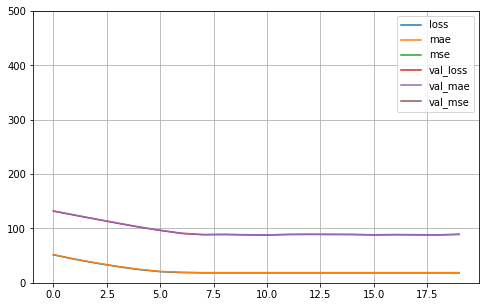

##################################################


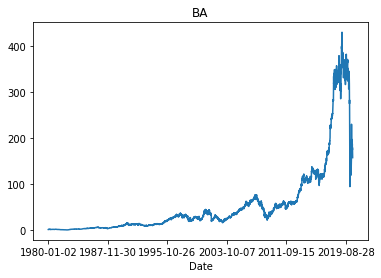

BA
(10234,)
Train on 7645 samples, validate on 1249 samples
Epoch 1/20
7645/7645 [==============================] - 4s 523us/sample - loss: 15.4068 - mae: 15.8973 - mse: 481.0280 - val_loss: 64.9568 - val_mae: 65.4568 - val_mse: 5038.0454
Epoch 2/20
7645/7645 [==============================] - 2s 292us/sample - loss: 13.2202 - mae: 13.7126 - mse: 340.5986 - val_loss: 59.3410 - val_mae: 59.8409 - val_mse: 4334.8833
Epoch 3/20
7645/7645 [==============================] - 2s 286us/sample - loss: 7.6964 - mae: 8.1692 - mse: 172.1103 - val_loss: 50.9199 - val_mae: 51.4199 - val_mse: 3399.4492
Epoch 4/20
7645/7645 [==============================] - 2s 289us/sample - loss: 5.1724 - mae: 5.6357 - mse: 101.8025 - val_loss: 45.9719 - val_mae: 46.4719 - val_mse: 2911.6284
Epoch 5/20
7645/7645 [==============================] - 2s 286us/sample - loss: 3.9203 - mae: 4.3669 - mse: 69.7450 - val_loss: 41.8921 - val_mae: 42.3921 - val_mse: 2543.8027
Epoch 6/20
7645/7645 [==============================

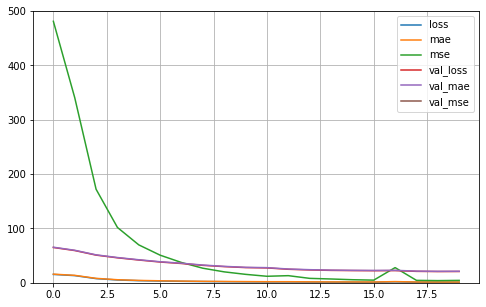

##################################################


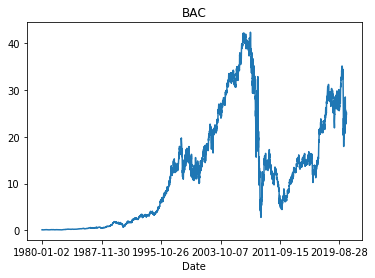

BAC
(10234,)
Train on 7645 samples, validate on 1249 samples
Epoch 1/20
7645/7645 [==============================] - 4s 556us/sample - loss: 8.1398 - mae: 8.6127 - mse: 156.8129 - val_loss: 7.9853 - val_mae: 8.4853 - val_mse: 81.3269
Epoch 2/20
7645/7645 [==============================] - 2s 293us/sample - loss: 4.9510 - mae: 5.3989 - mse: 76.5074 - val_loss: 3.7657 - val_mae: 4.2638 - val_mse: 23.0400
Epoch 3/20
7645/7645 [==============================] - 2s 296us/sample - loss: 3.4631 - mae: 3.9075 - mse: 40.7531 - val_loss: 1.3518 - val_mae: 1.8003 - val_mse: 4.6302
Epoch 4/20
7645/7645 [==============================] - 2s 304us/sample - loss: 2.6730 - mae: 3.1099 - mse: 23.1611 - val_loss: 3.7656 - val_mae: 4.2656 - val_mse: 18.5485
Epoch 5/20
7645/7645 [==============================] - 2s 307us/sample - loss: 1.9837 - mae: 2.4347 - mse: 12.9359 - val_loss: 3.1303 - val_mae: 3.6303 - val_mse: 14.5070
Epoch 6/20
7645/7645 [==============================] - 2s 307us/sample - loss:

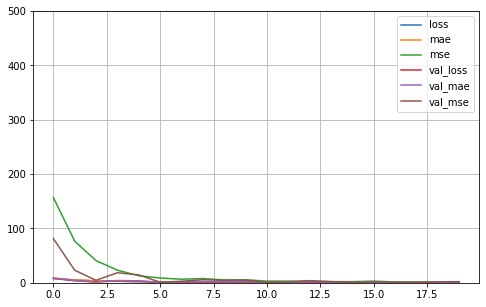

##################################################


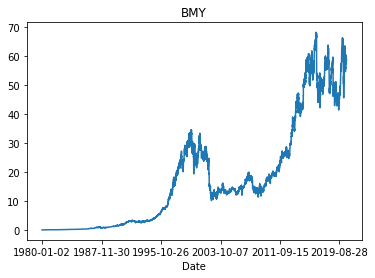

BMY
(10234,)
Train on 7645 samples, validate on 1249 samples
Epoch 1/20
7645/7645 [==============================] - 4s 572us/sample - loss: 6.0990 - mae: 6.5751 - mse: 83.6240 - val_loss: 21.2767 - val_mae: 21.7767 - val_mse: 597.5206
Epoch 2/20
7645/7645 [==============================] - 2s 290us/sample - loss: 2.8536 - mae: 3.2997 - mse: 27.8318 - val_loss: 17.8348 - val_mae: 18.3348 - val_mse: 469.4541
Epoch 3/20
7645/7645 [==============================] - 2s 290us/sample - loss: 2.3576 - mae: 2.7938 - mse: 19.9413 - val_loss: 15.8942 - val_mae: 16.3942 - val_mse: 386.8153
Epoch 4/20
7645/7645 [==============================] - 2s 290us/sample - loss: 1.8529 - mae: 2.2826 - mse: 12.5149 - val_loss: 12.6326 - val_mae: 13.1143 - val_mse: 300.8622
Epoch 5/20
7645/7645 [==============================] - 2s 291us/sample - loss: 1.4121 - mae: 1.8329 - mse: 7.3236 - val_loss: 10.8247 - val_mae: 11.3201 - val_mse: 233.1839
Epoch 6/20
7645/7645 [==============================] - 2s 283us/

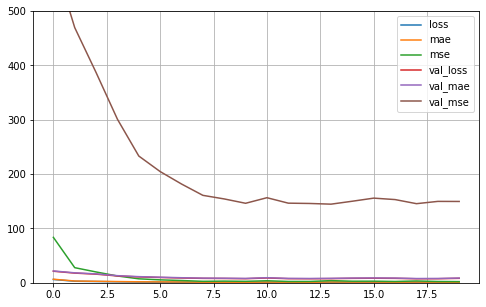

##################################################


In [12]:
model = two_layered_lstm()
training_loop(model)